## 1: Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


## 2: Load the Dataset

In [5]:
file_path = r"C:\Users\mohil\Desktop\Neu Ai Tech\Agriculture Data and dashboard\agriculture_advanced_ml_ready_dataset.xlsx"

import pandas as pd

df = pd.read_excel(file_path)

fact = pd.read_excel(file_path, sheet_name="Fact_Production")
crop = pd.read_excel(file_path, sheet_name="Dim_Crop")
soil = pd.read_excel(file_path, sheet_name="Dim_Soil")
irrigation = pd.read_excel(file_path, sheet_name="Dim_Irrigation")
geo = pd.read_excel(file_path, sheet_name="Dim_Geography")
time = pd.read_excel(file_path, sheet_name="Dim_Time")

## 3: Merge Dimension Tables

In [8]:
df = (
    fact
    .merge(crop, on="Crop_ID", how="left")
    .merge(soil, on="Soil_ID", how="left")
    .merge(irrigation, on="Irrigation_ID", how="left")
    .merge(geo, on="Geo_ID", how="left")
    .merge(time, on="Time_ID", how="left")
)


In [10]:
if 'Season_x' in df.columns and 'Season_y' in df.columns:
    df = df.drop(columns=['Season_x'])
    df = df.rename(columns={'Season_y': 'Season'})

## 4: EDA

In [13]:
print(df.shape)
df.head()

(20000, 25)


,Farmer_ID,Geo_ID,Crop_ID,Soil_ID,Irrigation_ID,Time_ID,Rainfall_mm,Avg_Temperature_C,Yield_q_per_acre,Total_Yield_q,...,Base_Yield_q_per_acre,Soil_Type,Fertility_Index,Irrigation_Type,Efficiency_Index,State,District,Country,Year,Season
0,10780,2,4,2,5,5,355.0,18.3,50.69,271.70,...,45,Black,1.10,Sprinkler,1.15,Maharashtra,District_B,India,2022,Kharif
1,10190,10,5,2,3,6,693.6,30.9,22.80,81.40,...,18,Black,1.10,Borewell,1.05,Karnataka,District_A,India,2022,Rabi
2,11726,10,5,4,5,6,1049.0,30.6,23.51,31.03,...,18,Laterite,0.90,Sprinkler,1.15,Karnataka,District_A,India,2022,Rabi
3,11293,6,4,3,5,5,358.4,22.7,40.52,234.21,...,45,Red,0.95,Sprinkler,1.15,Punjab,District_C,India,2022,Kharif
4,10998,12,6,1,5,11,275.2,14.4,12.67,49.41,...,12,Alluvial,1.15,Sprinkler,1.15,Karnataka,District_C,India,2023,Zaid


In [15]:
df.info()

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Farmer_ID               20000 non-null  int64  
 1   Geo_ID                  20000 non-null  int64  
 2   Crop_ID                 20000 non-null  int64  
 3   Soil_ID                 20000 non-null  int64  
 4   Irrigation_ID           20000 non-null  int64  
 5   Time_ID                 20000 non-null  int64  
 6   Rainfall_mm             20000 non-null  float64
 7   Avg_Temperature_C       20000 non-null  float64
 8   Yield_q_per_acre        20000 non-null  float64
 9   Total_Yield_q           20000 non-null  float64
 10  Input_Cost_INR          20000 non-null  float64
 11  Market_Price_INR_per_q  20000 non-null  float64
 12  Total_Revenue_INR       20000 non-null  float64
 13  Profit_Loss_INR         20000 non-null  float64
 14  Crop_Name               20000 non-null

Series([], dtype: int64)

In [17]:
df.describe()

,Farmer_ID,Geo_ID,Crop_ID,Soil_ID,Irrigation_ID,Time_ID,Rainfall_mm,Avg_Temperature_C,Yield_q_per_acre,Total_Yield_q,Input_Cost_INR,Market_Price_INR_per_q,Total_Revenue_INR,Profit_Loss_INR,Base_Yield_q_per_acre,Fertility_Index,Efficiency_Index,Year
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000
mean,11000.877700,9.528250,4.005200,2.996150,2.999950,8.752000,564.381970,24.520215,23.242504,93.867795,45359.840341,2199.682336,2.064706e+05,1.611108e+05,22.80215,0.990287,1.070318,2022.580000
std,577.556862,5.191055,1.995012,1.414792,1.418291,4.374717,274.294551,5.017570,10.235219,77.338493,25773.602998,300.715600,1.740687e+05,1.556337e+05,10.20326,0.115784,0.120876,1.094102
min,10001.000000,1.000000,1.000000,1.000000,1.000000,2.000000,50.000000,6.800000,5.020000,0.570000,-508.310000,987.230000,1.119950e+03,-2.200878e+04,12.00000,0.850000,0.850000,2021.000000
25%,10499.000000,5.000000,2.000000,2.000000,2.000000,5.000000,332.000000,21.000000,16.280000,41.247500,26495.487500,1998.322500,8.882800e+04,5.819790e+04,15.00000,0.900000,1.050000,2022.000000
50%,11003.000000,10.000000,4.000000,3.000000,3.000000,9.000000,485.550000,24.450000,21.330000,73.010000,40079.365000,2198.290000,1.577706e+05,1.153429e+05,20.00000,0.950000,1.100000,2023.000000
75%,11501.000000,14.000000,6.000000,4.000000,4.000000,13.000000,823.725000,28.000000,27.820000,123.210000,58957.487500,2402.727500,2.712897e+05,2.121398e+05,28.00000,1.100000,1.150000,2024.000000
max,12000.000000,18.000000,7.000000,5.000000,5.000000,16.000000,1293.000000,42.300000,76.290000,1240.320000,237117.230000,3362.970000,2.781752e+06,2.547257e+06,45.00000,1.150000,1.200000,2024.000000


### Target Variable Distribution

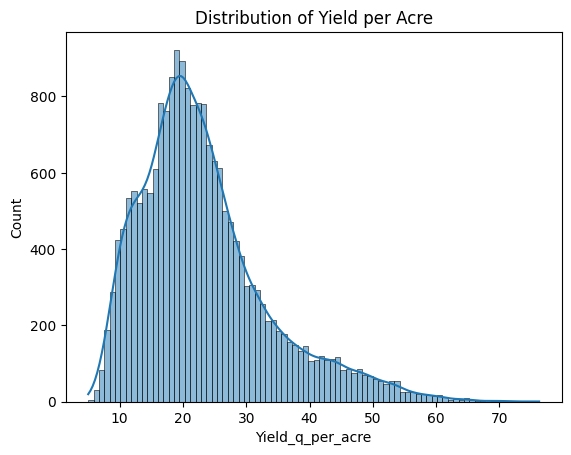

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(df['Yield_q_per_acre'], kde=True)
plt.title("Distribution of Yield per Acre")
plt.show()


### Outlier Check (Target)

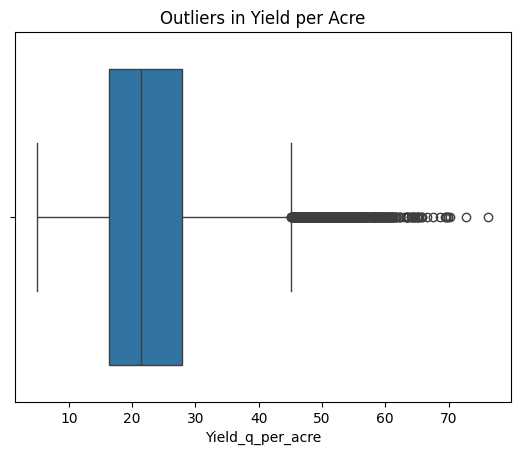

In [23]:
plt.figure()
sns.boxplot(x=df['Yield_q_per_acre'])
plt.title("Outliers in Yield per Acre")
plt.show()

### Correlation (Numerical Features)

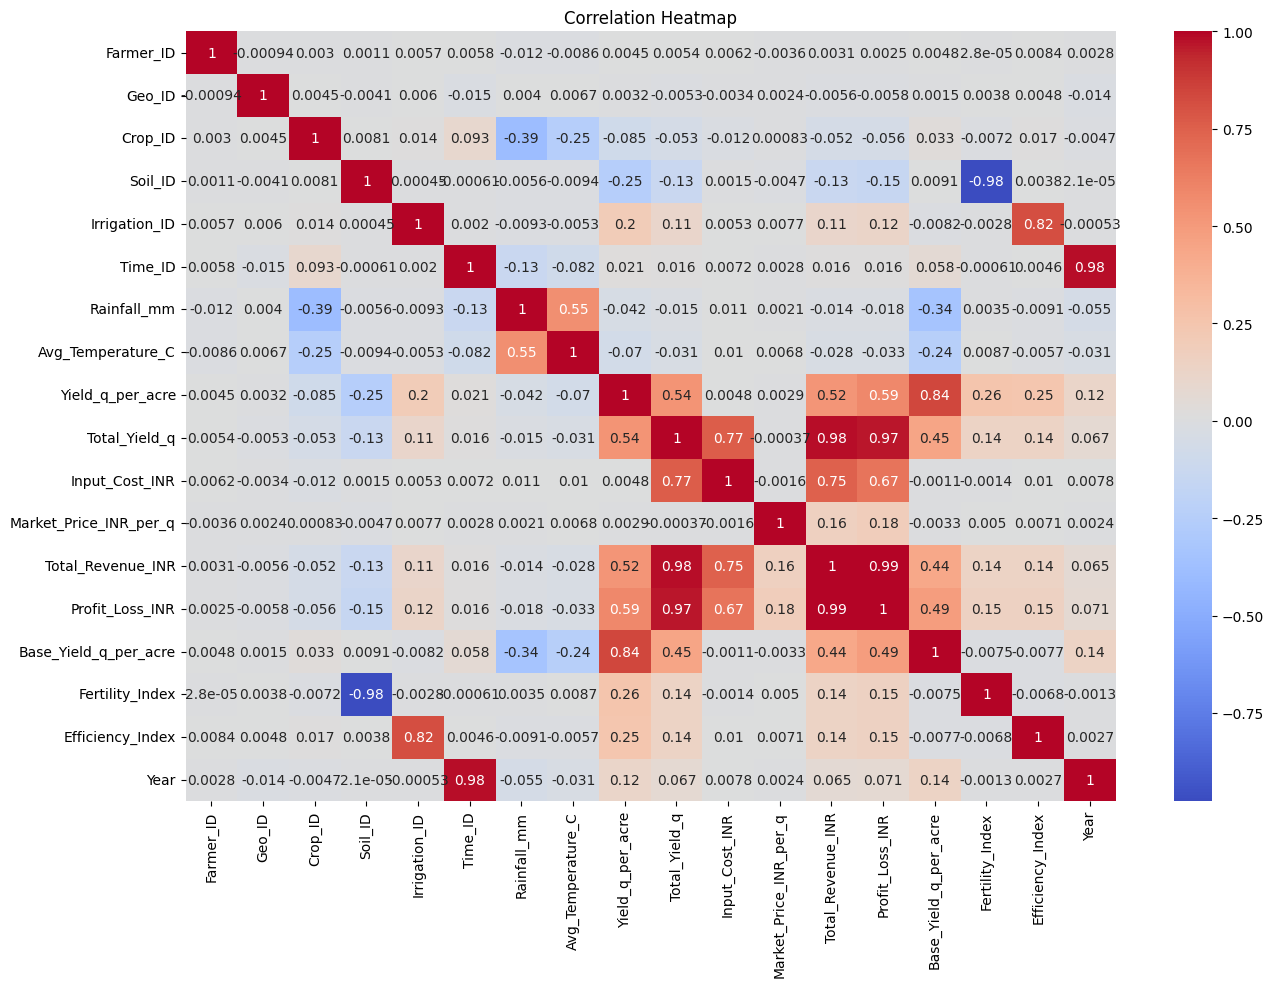

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    df.select_dtypes(include=['int64', 'float64']).corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()


### Yield vs Key Drivers

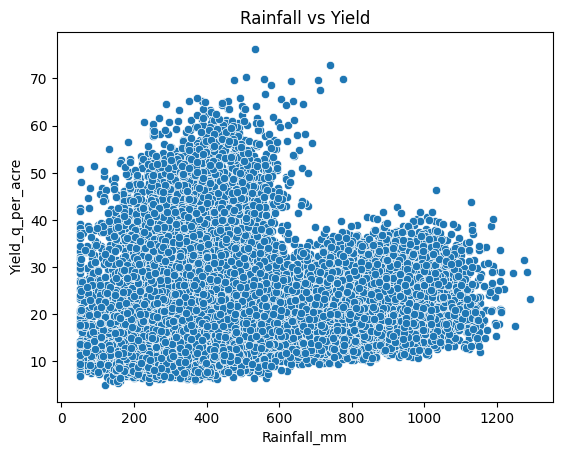

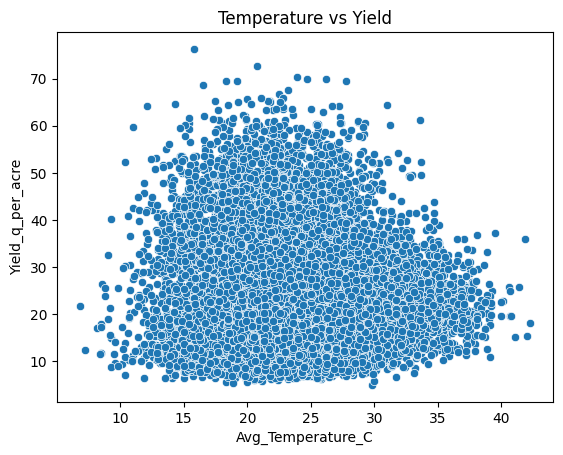

In [29]:
sns.scatterplot(
    x='Rainfall_mm',
    y='Yield_q_per_acre',
    data=df
)
plt.title("Rainfall vs Yield")
plt.show()

sns.scatterplot(
    x='Avg_Temperature_C',
    y='Yield_q_per_acre',
    data=df
)
plt.title("Temperature vs Yield")
plt.show()

### Categorical Impact on Yield

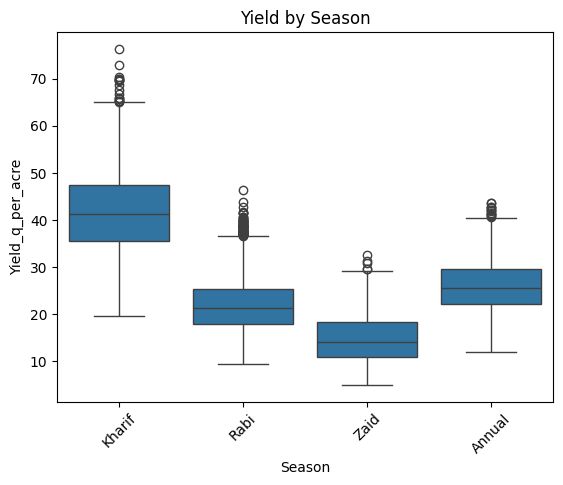

In [32]:
sns.boxplot(
    x='Season',
    y='Yield_q_per_acre',
    data=df
)
plt.xticks(rotation=45)
plt.title("Yield by Season")
plt.show()

## 5: Remove Unnecessary & Leakage Columns

In [35]:
drop_columns = [
    # IDs
    'Farmer_ID', 'Crop_ID', 'Soil_ID', 'Irrigation_ID',
    'Geo_ID', 'Time_ID',

    # Leakage (outputs / economics)
    'Total_Yield_q', 'Input_Cost_INR',
    'Market_Price_INR_per_q', 'Total_Revenue_INR',
    'Profit_Loss_INR'
]

df = df.drop(columns=[col for col in drop_columns if col in df.columns])

In [39]:
df.head()

,Rainfall_mm,Avg_Temperature_C,Yield_q_per_acre,Crop_Name,Base_Yield_q_per_acre,Soil_Type,Fertility_Index,Irrigation_Type,Efficiency_Index,State,District,Country,Year,Season
0,355.0,18.3,50.69,Sugarcane,45,Black,1.10,Sprinkler,1.15,Maharashtra,District_B,India,2022,Kharif
1,693.6,30.9,22.80,Maize,18,Black,1.10,Borewell,1.05,Karnataka,District_A,India,2022,Rabi
2,1049.0,30.6,23.51,Maize,18,Laterite,0.90,Sprinkler,1.15,Karnataka,District_A,India,2022,Rabi
3,358.4,22.7,40.52,Sugarcane,45,Red,0.95,Sprinkler,1.15,Punjab,District_C,India,2022,Kharif
4,275.2,14.4,12.67,Pulses,12,Alluvial,1.15,Sprinkler,1.15,Karnataka,District_C,India,2023,Zaid


## 6: Define Target & Features

In [42]:
target = 'Yield_q_per_acre'

X = df.drop(columns=[target])
y = df[target]

## 7: Separate Numerical & Categorical Columns

In [45]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

## 8: Train–Test Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## 9: Preprocessing Pipeline

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


## 10: Model Definition (Gradient Boosting)

### 10A: Import GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

### 10B: Define the Pipeline

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

### 10C: Define Parameter Grid

In [63]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4],
    'regressor__subsample': [0.8, 1.0]
}

### 10D: Setup GridSearchCV

In [66]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

### 10E: Run Grid Search

In [69]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Rainfall_mm', 'Avg_Temperature_C', 'Base_Yield_q_per_acre',
       'Fertility_Index', 'Efficiency_Index', 'Year'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Crop_Name', 'Soil_Type', 'Irrigation_Type', 'State', 'District',
       'Country', 'Season'],
      dtype='object'))])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.05, 0.1],
                         'regressor__max_depth': [3, 4],
                         'regressor__n_estimators': [100, 200],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

### 10F: Best Model & Parameters

In [72]:
print("Best Parameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Best Parameters:
{'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}


## 11: Evaluate the Model

In [75]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = best_model.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE      :", mean_absolute_error(y_test, y_pred))

R2 Score : 0.9368298442128535
RMSE     : 2.5609638275195086
MAE      : 1.8704707911718088


## 13: Predict Yield for New Input

In [80]:
print(X_train.columns.tolist())

['Rainfall_mm', 'Avg_Temperature_C', 'Crop_Name', 'Base_Yield_q_per_acre', 'Soil_Type', 'Fertility_Index', 'Irrigation_Type', 'Efficiency_Index', 'State', 'District', 'Country', 'Year', 'Season']


In [82]:
new_data = pd.DataFrame({
    'Rainfall_mm': [800],
    'Avg_Temperature_C': [27],
    'Crop_Name': ['Maize'],
    'Season': ['Kharif'],
    'Base_Yield_q_per_acre': [22],
    'Soil_Type': ['Black'],
    'Fertility_Index': [1.15],
    'Irrigation_Type': ['Canal'],
    'Efficiency_Index': [1.1],
    'State': ['Maharashtra'],
    'District': ['District_A'],
    'Country': ['India'],
    'Year': [2023]
})

predicted_yield = best_model.predict(new_data)
print("Predicted Yield (q/acre):", predicted_yield[0])

Predicted Yield (q/acre): 39.610180702171505


In [84]:
import joblib

joblib.dump(best_model, "yield_model.pkl")

print("Model saved successfully")

Model saved successfully
